In [1]:
import scanpy as sc
import anndata as ann
import numpy as np
import scipy as sp
#import louvain
import pandas as pd
import igraph as ig
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors

import os

#doublet detection
#import scrublet as scr
#batch correction (not installed by default in the docker container, install via command line: pip install scanorama bbknn)
#import scanorama as scan
#external modules
import scanpy.external as sce
#pretty plotting
import seaborn as sns 

In [2]:
#adata = sc.read_10x_mtx("/scratch1/yuninghu/Single_cell/GSE163577_RAW/GSM4982094_AD05_Hpc_filtered_feature_bc_matrix")
adata = sc.read_h5ad("Electric_rats_scrubblet_harmony_leiden.h5ad")
adata.obs

,Group,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,...,leiden_res_0.20,leiden_res_0.30,leiden_res_0.40,leiden_res_0.50,leiden_res_0.60,leiden_res_0.70,leiden_res_0.80,leiden_res_0.90,leiden_res_1.00,leiden_res_2.00
AAACCAAAGCCATCCC-1-100lib,100lib,2592,7.860571,5134.0,8.543835,18.543046,25.048695,34.086482,50.915466,0.0,...,0,0,0,0,0,0,0,0,0,0
AAACCAAAGGCGTCCA-1-100lib,100lib,835,6.728629,1186.0,7.079185,24.451939,33.389545,46.458685,71.753794,0.0,...,1,1,2,3,1,4,4,2,6,9
AAACCAAAGGTGGATG-1-100lib,100lib,2633,7.876259,5293.0,8.574329,18.458341,25.675420,35.310788,51.879841,0.0,...,0,0,0,0,0,0,0,0,0,2
AAACCAAAGTAGAGTA-1-100lib,100lib,1127,7.028201,1714.0,7.447168,21.703617,30.455076,42.123687,63.418903,0.0,...,0,0,0,0,0,0,0,0,0,1
AAACCAAAGTATGGTT-1-100lib,100lib,701,6.553933,981.0,6.889591,23.343527,33.537207,48.929664,79.510703,0.0,...,1,1,2,3,1,4,4,2,6,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGTGTTGAGCGAAGGC-1-Shamlib,Shamlib,1152,7.050123,1821.0,7.507690,23.668314,32.235036,43.712246,64.195497,0.0,...,11,12,9,17,18,23,21,25,27,36
TGTGTTGAGGTAAGCG-1-Shamlib,Shamlib,602,6.401917,763.0,6.638568,20.838794,33.944954,47.313237,86.631717,0.0,...,0,0,0,0,0,2,1,1,1,3
TGTGTTGAGGTCCCGA-1-Shamlib,Shamlib,1497,7.311886,2729.0,7.912057,25.357274,33.638695,44.631733,63.466471,0.0,...,8,8,10,10,8,14,12,18,13,22
TGTGTTGAGGTTCGTA-1-Shamlib,Shamlib,2236,7.712891,5032.0,8.523771,23.012719,31.160572,41.931638,59.439587,0.0,...,8,8,10,10,8,14,12,18,13,22


In [4]:
adata.obs["cell_types0.5"] = adata.obs["leiden_res_0.50"].map(
    {
        "0": "Rod photoreceptors",
        "1": "Rod photoreceptors",
        "2": "Rod photoreceptors",
        "3": "RGC",
        "4": "Amacrine/RGC/Müller Glia",
        "5": "Off bipolar",
        "6": "On bipolar",
        "7": "On bipolar/Müller Glia",
        "8": "Microglia",
        "9": "Müller Glia/RPC",
        "10": "Müller Glia/RPC-2",
        "11": "Müller Glia/RPC",
        "12": "Müller Glia/RPC-2",
        "13": "Müller Glia/RPC-2",
        "14": "Rod bipolar",
        "15": "Unknown",
        "16": "Amacrine", 
        "17": "Unknown",
        "18": "Microglia",
        "19": "Pericyte",
        "20": "Unknown",
        "21": "Amacrine",
        "22": "Unknown",
        "23": "Unknown",
        "24": "Cone Photoreceptor",
        "25": "Erythroblast",
        "26": "Unknown",
        "27": "Müller Glia/RPC",
        "28": "Amacrine/RGC/Müller Glia",
        "29": "Amacrine/RGC/Müller Glia",
        "30": "Amacrine/RGC/Müller Glia"}
        
)

In [9]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [5]:
#Pseudobulk DEG
import random

adata_100_sham = adata[adata.obs["Group"].isin(["100lib", "Shamlib"])].copy()

group_col = "Group"
sample_col = "Sample"

# Directly use Group as sample identifier
adata_100_sham.obs[sample_col] = adata_100_sham.obs[group_col]


cell_subset = adata_100_sham[adata_100_sham.obs['cell_types0.5'] == 'Müller Glia/RPC'] # or leiden_res_0.50 10
cell_subset

View of AnnData object with n_obs × n_vars = 1931 × 20977
    obs: 'Group', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet', 'leiden', 'leiden_res_0.05', 'leiden_res_0.10', 'leiden_res_0.20', 'leiden_res_0.30', 'leiden_res_0.40', 'leiden_res_0.50', 'leiden_res_0.60', 'leiden_res_0.70', 'leiden_res_0.80', 'leiden_res_0.90', 'leiden_res_1.00', 'leiden_res_2.00', 'cell_types0.5', 'Sample'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersio

In [ ]:
#without pseudo replicates
pbs = []
for sample in cell_subset.obs.Sample.unique():
    samp_cell_subset = cell_subset[cell_subset.obs['Sample'] == sample].copy()
    
    # Use raw counts safely from sparse layer
    samp_cell_subset.X = samp_cell_subset.layers['counts'].copy()

    # Sum over cells and ensure shape is (1, n_genes)
    summed = samp_cell_subset.X.sum(axis=0)
    if hasattr(summed, "toarray"):
        summed = summed.toarray()
    summed = np.array(summed).reshape(1, -1)

    # Create AnnData with proper shape and metadata
    rep_adata = sc.AnnData(X=summed, var=samp_cell_subset.var.copy())
    
    rep_adata.obs_names = [sample]
    rep_adata.obs['Group'] = samp_cell_subset.obs['Group'].iloc[0]
    
    pbs.append(rep_adata)

In [6]:
#with pseudo replicates

import random
import numpy as np
import scanpy as sc

n_replicates = 3
pbs = []

for sample in cell_subset.obs.Sample.unique():
    samp_cell_subset = cell_subset[cell_subset.obs['Sample'] == sample].copy()
    samp_cell_subset.X = samp_cell_subset.layers['counts'].copy()

    indices = list(samp_cell_subset.obs_names)
    random.shuffle(indices)
    split_indices = np.array_split(np.array(indices), n_replicates)

    for i, pseudo_rep in enumerate(split_indices):
        if len(pseudo_rep) == 0:
            continue  # skip empty replicates

        cells = samp_cell_subset[pseudo_rep]
        summed = cells.X.sum(axis=0)

        if hasattr(summed, "toarray"):
            summed = summed.toarray()
        summed = np.array(summed).reshape(1, -1)

        rep_adata = sc.AnnData(X=summed, var=cells.var.copy())
        rep_adata.obs_names = [f"{sample}_{i}"]
        rep_adata.obs['Group'] = cells.obs['Group'].iloc[0]
        rep_adata.obs['replicate'] = [i]

        pbs.append(rep_adata)

In [7]:
pb = sc.concat(pbs)


In [8]:
pb.obs


,Group,replicate
100lib_0,100lib,0
100lib_1,100lib,1
100lib_2,100lib,2
Shamlib_0,Shamlib,0
Shamlib_1,Shamlib,1
Shamlib_2,Shamlib,2


In [10]:
counts = pd.DataFrame(pb.X, columns = pb.var_names, index=pb.obs_names) #need to do this to pass var names


In [11]:
filtered_counts = counts.loc[:, (counts > 10).sum(axis=0) >= 3]
filtered_counts

,Got1,Map6,Zfyve27,Cyth2,Sv2b,Glrx3,Lipt2,Dpysl4,Fam204a,Ttyh1,...,Mt-nd5,Mt-nd6,Mt-cyb,Dkc1,ENSRNOG00000070284,ENSRNOG00000068039,LOC120099628,AABR07015057.1,AABR07000398.1,LOC363181
100lib_0,173.0,34.0,30.0,79.0,72.0,156.0,18.0,43.0,77.0,1367.0,...,853.0,252.0,19192.0,83.0,212.0,19.0,11.0,291.0,40.0,23.0
100lib_1,191.0,44.0,13.0,89.0,97.0,150.0,20.0,63.0,71.0,1368.0,...,1105.0,227.0,21501.0,104.0,266.0,14.0,7.0,306.0,51.0,19.0
100lib_2,185.0,28.0,21.0,68.0,75.0,134.0,13.0,54.0,68.0,1358.0,...,785.0,270.0,18353.0,105.0,243.0,24.0,5.0,272.0,58.0,22.0
Shamlib_0,46.0,8.0,8.0,12.0,36.0,37.0,8.0,13.0,10.0,122.0,...,409.0,76.0,6244.0,32.0,20.0,3.0,5.0,56.0,11.0,6.0
Shamlib_1,54.0,17.0,3.0,19.0,23.0,42.0,7.0,14.0,23.0,136.0,...,437.0,70.0,6345.0,28.0,16.0,2.0,22.0,64.0,10.0,6.0
Shamlib_2,42.0,8.0,5.0,12.0,28.0,41.0,6.0,18.0,25.0,114.0,...,439.0,80.0,6000.0,18.0,15.0,0.0,13.0,46.0,14.0,9.0


In [12]:
dds = DeseqDataSet(
    counts = filtered_counts, #filtered_counts
    metadata=pb.obs, #was : pb.obs
    design_factors="Group")

/var/folders/d5/3p9pxq8j3nxfyr7pww2qtdzh0000gn/T/ipykernel_45459/3226788368.py:1: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(


In [13]:
sc.pp.filter_genes(dds, min_cells = 1)


In [14]:
dds.deseq2()


Using None as control genes, passed at DeseqDataSet initialization


Fitting size factors...
... done in 0.01 seconds.

/Users/erik.huang/Library/jupyterlab-desktop/envs/scanpy/lib/python3.13/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/erik.huang/Library/jupyterlab-desktop/envs/scanpy/lib/python3.13/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/erik.huang/Library/jupyterlab-desktop/envs/scanpy/lib/python3.13/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
python(45520) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(45521) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(45522) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(45523) MallocSta

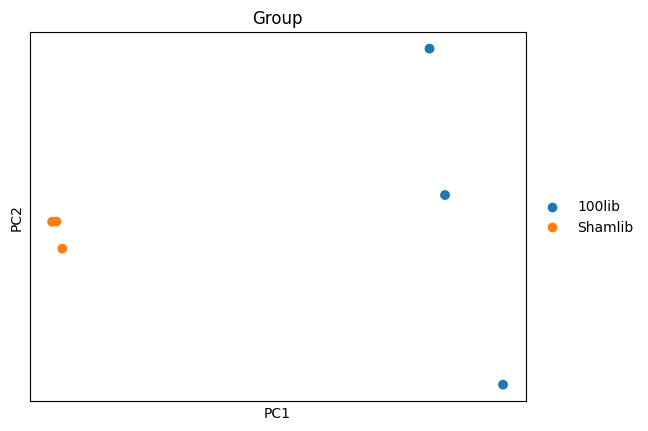

In [15]:
sc.tl.pca(dds)
sc.pl.pca(dds, color = 'Group', size = 200)


In [16]:
stat_res = DeseqStats(dds, n_cpus=8, contrast=('Group', '100lib', 'Shamlib'))
    
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: Group 100lib vs Shamlib
                      baseMean  log2FoldChange     lfcSE      stat  \
Got1                 91.523077        0.138842  0.190057  0.730532   
Map6                 19.077791       -0.130633  0.387377 -0.337223   
Zfyve27              10.717930        0.191711  0.561154  0.341637   
Cyth2                33.576440        0.641081  0.305895  2.095752   
Sv2b                 48.246368       -0.341267  0.256027 -1.332934   
...                        ...             ...       ...       ...   
ENSRNOG00000068039    6.585144        1.719552  0.806084  2.133217   
LOC120099628         14.008806       -2.594739  0.525633 -4.936409   
AABR07015057.1      126.661820        0.574991  0.170648  3.369461   
AABR07000398.1       23.966069        0.273628  0.362766  0.754281   
LOC363181            12.171905       -0.207024  0.474565 -0.436238   

                          pvalue      padj  
Got1                4.650652e-01  0.677450  
Map6   

... done in 0.72 seconds.



In [17]:
de  = stat_res.results_df


In [18]:
de.sort_values('log2FoldChange', ascending = False)


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Cldn23,5.410757,3.936267,1.488039,2.645272,8.162537e-03,NaN
Foxo1,4.842229,3.771432,1.488068,2.534449,1.126244e-02,NaN
Slc7a3,32.479012,3.121140,0.486350,6.417473,1.385547e-10,4.961354e-09
Cnbd1,5.693677,3.059567,1.133378,2.699511,6.944148e-03,NaN
Ier5,13.991912,2.724033,0.669062,4.071420,4.672737e-05,NaN
...,...,...,...,...,...,...
Crygd,145.231106,-6.991089,0.423906,-16.492068,4.183782e-61,1.325841e-57
Krt5,10.818338,-7.805223,1.983885,-3.934313,8.343503e-05,NaN
Crygc,130.647793,-8.545086,0.735623,-11.616114,3.413095e-31,9.832817e-29
Lypd2,27.429200,-9.149599,1.958363,-4.672065,2.981871e-06,5.163689e-05


In [19]:
de["padj"].fillna(1)
dfup=de.loc[(de["padj"] < 0.05) & (de["log2FoldChange"]> (0.3))]
dfdown=de.loc[(de["padj"] < 0.05) & (de["log2FoldChange"]<  -(0.3))]
dfdown

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Mrpl36,60.509003,-0.616918,0.222196,-2.776462,5.495398e-03,3.166349e-02
AABR07005588.1,42.265117,-0.812356,0.255173,-3.183543,1.454844e-03,1.105612e-02
Pgm2l1,56.758669,-0.769911,0.234241,-3.286834,1.013207e-03,8.097990e-03
Ube3a,71.308464,-0.920534,0.209259,-4.399021,1.087403e-05,1.599062e-04
ENSRNOG00000066023,56.012130,-0.759765,0.259858,-2.923767,3.458235e-03,2.225208e-02
...,...,...,...,...,...,...
Mt-co3,10025.787623,-0.535220,0.075566,-7.082864,1.412054e-12,6.729019e-11
Mt-nd3,624.775758,-0.607477,0.117640,-5.163861,2.419079e-07,5.232806e-06
Mt-nd4l,401.261221,-1.119678,0.140245,-7.983738,1.419672e-15,9.471451e-14
Mt-nd4,3201.511099,-0.452902,0.084624,-5.351955,8.700885e-08,2.020008e-06


In [ ]:
de.to_csv("Muller_RPC_100vsSham.csv")
dfdown.to_csv("Down_DEG_Muller_RPC_100vsSham.csv")
dfup.to_csv("Up_DEG_Muller_RPC_100vsSham.csv")

In [ ]:
#volcano plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

de = pd.read_csv("DEG_cluster10_100vsSham.csv", index_col="Unnamed: 0")

# Preprocessing
de["padj"] = de["padj"].fillna(1)
de["-log10(padj)"] = -np.log10(de["padj"])

# Thresholds
log2fc_thresh = 0.3
padj_thresh = 0.05

# Classification
conditions = [
    (de["padj"] < padj_thresh) & (de["log2FoldChange"] > log2fc_thresh),
    (de["padj"] < padj_thresh) & (de["log2FoldChange"] < -log2fc_thresh),
]
choices = ["Up", "Down"]
de["sig"] = np.select(conditions, choices, default="NS")

# Plotting
plt.figure(figsize=(12, 10)) # Increased figure size for more space
colors = {"Up": "tab:red", "Down": "tab:blue", "NS": "lightgrey"}

for label, color in colors.items():
    subset = de[de["sig"] == label]
    plt.scatter(subset["log2FoldChange"], subset["-log10(padj)"],
                c=color, label=label, s=15, alpha=0.7)

# Threshold lines
plt.axhline(-np.log10(padj_thresh), color="black", linestyle="--", linewidth=0.8)
plt.axvline(log2fc_thresh, color="black", linestyle="--", linewidth=0.8)
plt.axvline(-log2fc_thresh, color="black", linestyle="--", linewidth=0.8)

# Axis limits (adjust if needed)
plt.xlim(-10, 10)


significant_genes = de.loc[(de['padj'] < padj_thresh)]

top_up = significant_genes.loc[(significant_genes['log2FoldChange'] > log2fc_thresh)].nlargest(8, 'log2FoldChange')

top_down = significant_genes.loc[(significant_genes['log2FoldChange'] < -log2fc_thresh)].nsmallest(8, 'log2FoldChange')

genes_to_label = pd.concat([top_up, top_down])

texts = []
for gene, row in genes_to_label.iterrows():
    texts.append(
    plt.text(row["log2FoldChange"], row["-log10(padj)"], gene, fontsize=9)
    )

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=1))
# --- End of new section ---

plt.xlabel("$log_2(Fold Change)$")
plt.ylabel("$-log_{10}(padj)$")
plt.title("Volcano Plot with Top 20 Up/Down Genes")
plt.legend()
plt.tight_layout()

plt.show()

In [20]:
dfup=pd.read_csv("./RPC_Muller_DEG/Up_DEG_Muller_RPC_100vsSham.csv",index_col=0)
dfup

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Ttyh1,473.050571,1.642073,0.121467,13.518699,1.213020e-41,3.807779e-39
Prss23,96.757849,1.479470,0.201988,7.324541,2.397177e-13,1.041189e-11
Scd2,520.022199,0.646857,0.114127,5.667876,1.445784e-08,3.454874e-07
Eml2,41.112029,0.786058,0.279514,2.812227,4.919972e-03,2.761957e-02
Nr1h2,21.903962,1.158917,0.385988,3.002466,2.678021e-03,1.728450e-02
...,...,...,...,...,...,...
Rilpl2,19.135983,1.183023,0.414950,2.851002,4.358167e-03,2.531329e-02
Tmed2,111.421007,0.475941,0.172145,2.764778,5.696161e-03,3.095019e-02
Eif2s3y,17.564478,1.763891,0.482752,3.653822,2.583659e-04,2.440567e-03
ENSRNOG00000070284,78.718604,2.000588,0.253092,7.904584,2.688301e-15,1.375216e-13


In [21]:
#pathway over DEG
# file: pathway_analysis.py

import pandas as pd
from gseapy import enrichr

# Input: dfup with gene symbols as index
def run_pathway_analysis(dfup: pd.DataFrame, organism: str = "Human") -> dict:
    gene_list = dfup.index.tolist()

    libraries = {
        'BP': 'GO_Biological_Process_2025', #GO_Biological_Process_2021
        'MF': 'GO_Molecular_Function_2025', #GO_Molecular_Function_2021
        'CC': 'GO_Cellular_Component_2025', # GO_Cellular_Component_2021
        'Protein': 'Tissue_Protein_Expression_from_ProteomicsDB',
        'TF': 'TF_Perturbations_Followed_by_Expression',
        'Reactome': 'Reactome_Pathways_2024',
        'wikimouse': 'WikiPathways_2024_Mouse',
        'hallmark': 'MSigDB_Hallmark_2020',
        'KEGG': 'KEGG_2019_Mouse',
        'MSigDB_Computational':'MSigDB_Computational',
        'Transcription_Factor_PPIs':'Transcription_Factor_PPIs'


    }

    results = {}

    for label, lib in libraries.items():
        enr = enrichr(
            gene_list=gene_list,
            gene_sets=lib,
            organism=organism,
            outdir=None,  # don't write to disk
            cutoff=0.05   # adjust cutoff if needed
        )

        results[label] = enr.results.sort_values('Adjusted P-value')

    return results



In [ ]:
pathway_results = run_pathway_analysis(dfup) #sig_genes or dfdown


In [ ]:
import pandas as pd

def export_significant_pathways_to_excel(pathway_results: dict, output_file: str = "./RPC_Muller_DEG_pathway/Up_DEG_Muller_RPC_100vsSham_significant_pathways.xlsx"):
    """
    Export pathway analysis results with P-value < 0.05 into an Excel file with separate sheets per category.

    Parameters:
    - pathway_results: dict of DataFrames (keys like 'BP', 'MF', etc.)
    - output_file: name of the output Excel file
    """
    with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
        for sheet_name, df in pathway_results.items():
            if not isinstance(df, pd.DataFrame):
                continue  # skip if not a DataFrame

            # Ensure "P-value" column exists before filtering
            if "P-value" in df.columns:
                filtered_df = df[df["P-value"] < 0.05]
                filtered_df.to_excel(writer, sheet_name=sheet_name, index=False)

    print(f"Export complete: {output_file}")

# Example usage
export_significant_pathways_to_excel(pathway_results)
